In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_excel('Data_Train.xlsx')
data_test = pd.read_excel('Test_set.xlsx')
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
print(data_train.shape)
print(data_test.shape)

(10683, 11)
(2671, 10)


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [6]:
data = data_train.append(data_test)

C:\Users\prajw\AppData\Local\Temp\ipykernel_19680\3614596354.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_train.append(data_test)


In [7]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
data.shape

(13354, 11)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [10]:
data['Date'] = data['Date_of_Journey'].str.split('/').str[0]
data['Month'] = data['Date_of_Journey'].str.split('/').str[1]
data['Year'] = data['Date_of_Journey'].str.split('/').str[2]

In [11]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [12]:
data['Date'] = data['Date'].astype('int')
data['Month'] = data['Month'].astype('int')
data['Year'] = data['Year'].astype('int')

In [13]:
data.drop('Date_of_Journey', axis = 1, inplace = True)

In [14]:
data['Arrival_Time'][0].str[:5]

0    01:10
0    04:25
Name: Arrival_Time, dtype: object

In [15]:
def convert_time(value):
    return str(value)[0:5]

In [16]:
data['Arrival_Time'] = data['Arrival_Time'].apply(convert_time)

In [17]:
data.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [18]:
data['Arrival_Hour'] = data['Arrival_Time'].str.split(':').str[0]
data['Arrival_Minutes'] = data['Arrival_Time'].str.split(':').str[1]

In [19]:
data['Arrival_Hour'] = data['Arrival_Hour'].astype('int')
data['Arrival_Minutes'] = data['Arrival_Minutes'].astype('int')

In [20]:
data.drop('Arrival_Time', axis = 1, inplace = True )

In [21]:
data['Departure_Hour'] = data['Dep_Time'].str.split(':').str[0]
data['Departure_Minutes'] = data['Dep_Time'].str.split(':').str[1]

In [22]:
data['Departure_Hour'] = data['Departure_Hour'].astype('int')
data['Departure_Minutes'] = data['Departure_Minutes'].astype('int')

In [23]:
data.drop('Dep_Time', axis = 1, inplace = True )

In [24]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35,16,50


In [25]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [26]:
data['Total_Stops'].isnull().sum()

1

In [27]:
data['Total_Stops'] = data['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4,'nan':1})

In [28]:
data.drop('Route', axis = 1, inplace = True)

In [29]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [30]:
data['Duration_Hour'] = data['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [34]:
data['Duration_Hour'] = data['Duration_Hour'].astype('int')

In [32]:
data[data['Duration_Hour'] == '5m']
# Absurd Features

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_Hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [33]:
drop_index = data[data['Duration_Hour'] == '5m'].index
data.drop(drop_index, axis = 0, inplace = True)

In [ ]:
# data[data['Duration_Hour'] == '5m']

In [35]:
data['Duration_Hour'] = data['Duration_Hour']*60

In [58]:
def convert_to_minutes(time_str):
    # split the time string into hours and minutes
    time_parts = time_str.split()
    hours = int(time_parts[0].replace("h", ""))

    # check if there are minutes specified
    if len(time_parts) > 1:
        minutes = int(time_parts[1].replace("m", ""))
    else:
        minutes = 0

    # calculate the total minutes
    total_minutes = hours * 60 + minutes
    return minutes

In [60]:
data['Duration_Minutes'] = data['Duration'].apply(convert_to_minutes)

In [63]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
data['Airline'] = le.fit_transform(data['Airline'])

In [68]:
data['Source'] = le.fit_transform(data['Source'])
data['Destination'] = le.fit_transform(data['Destination'])
data['Additional_Info'] = le.fit_transform(data['Additional_Info'])

In [70]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_Hour,Duration_Minutes
0,3,0,5,2h 50m,0.0,8,3897.0,24,3,2019,1,10,22,20,120,50
1,1,3,0,7h 25m,2.0,8,7662.0,1,5,2019,13,15,5,50,420,25
2,4,2,1,19h,2.0,8,13882.0,9,6,2019,4,25,9,25,1140,0
3,3,3,0,5h 25m,1.0,8,6218.0,12,5,2019,23,30,18,5,300,25
4,3,0,5,4h 45m,1.0,8,13302.0,1,3,2019,21,35,16,50,240,45


In [71]:
data.drop('Duration', axis = 1, inplace = True)

In [72]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Duration_Hour,Duration_Minutes
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,120,50
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,420,25
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,1140,0
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,300,25
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,240,45


<AxesSubplot:>

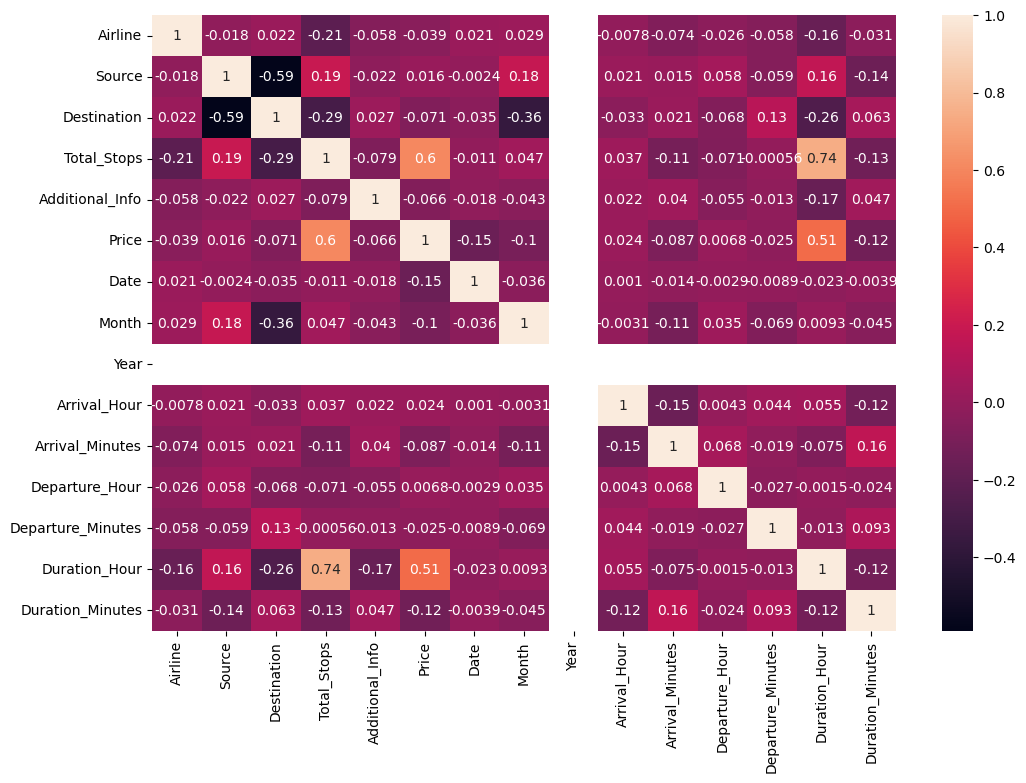

In [75]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(), annot = True)

In [80]:
data_train = data[~data['Price'].isnull()]
# Include only that data for train data which has non null values in the purchase column

In [91]:
X = data_train.drop(['Price', 'Year'], axis = 1)
y = data_train['Price']

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [90]:
data_train.dropna(inplace = True)

C:\Users\prajw\AppData\Local\Temp\ipykernel_19680\1828797412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.dropna(inplace = True)


In [94]:
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
lr_pred = lr.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test,lr_pred)))

4029.3175292785468


In [99]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [100]:
dt_pred = dt.predict(X_test)

In [101]:
print(np.sqrt(mean_squared_error(y_test,dt_pred)))

2472.038852241378


In [106]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9959427707901822
0.7681883668678462


In [107]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [108]:
rf_pred = rf.predict(X_test)

In [109]:
print(np.sqrt(mean_squared_error(y_test,rf_pred)))

2096.6281980182257


In [110]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9796083034017997
0.8332493685453899
